Creating graphs for variables stock index, interest rate, oil/VC funding, government debt, consumer confidence index, trading volume

C:\Users\liyan\AppData\Local\Temp\ipykernel_9644\605518990.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_avg_df = df[cols_to_process].resample('3M').mean()


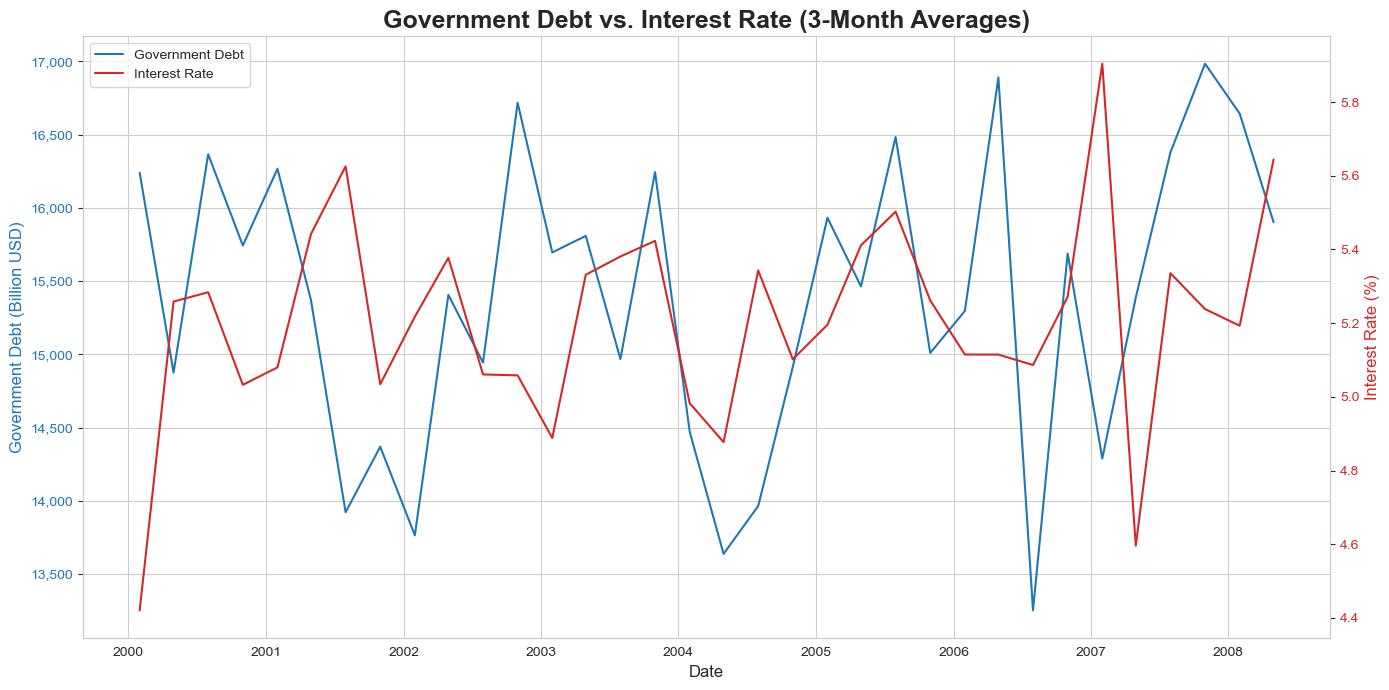

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Load and Clean the Data ---

try:
    df = pd.read_csv('finance_economics_dataset.csv')
except FileNotFoundError:
    print("Error: 'finance_economics_dataset.csv' not found.")
    print("Please download the dataset and place it in the same folder as this script.")
    exit()

# Clean column names for consistency
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\ufeff', '')
df.columns = df.columns.str.title()

# --- 2. Prepare and Resample Data ---

# Identify the columns to work with
debt_col = 'Government Debt (Billion Usd)'
rate_col = 'Interest Rate (%)'
cols_to_process = [debt_col, rate_col]

# Convert all relevant columns to numeric, coercing errors
for col in cols_to_process:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop rows with any missing values in the processed columns
df.dropna(subset=cols_to_process, inplace=True)

# Resample data into 3-month bins and calculate the mean for each bin
quarterly_avg_df = df[cols_to_process].resample('3M').mean()
quarterly_avg_df.dropna(inplace=True) # Remove any bins that might be empty

# --- 3. Create a Dual-Axis Line Plot ---

# Set up the plot style and figure
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 7))

# Define colors for clarity
color1 = 'tab:blue'
color2 = 'tab:red'

# Plot Government Debt on the primary y-axis (ax1)
sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=debt_col, ax=ax1, color=color1, label='Government Debt')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Government Debt (Billion USD)', color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
# Formatter to make y-axis more readable (e.g., 10,000 instead of 10000)
ax1.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


# Create a secondary y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Interest Rate on the secondary y-axis (ax2)
sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=rate_col, ax=ax2, color=color2, label='Interest Rate')
ax2.set_ylabel('Interest Rate (%)', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False) # Turn off the grid for the second axis to avoid clutter

# --- 4. Finalize and Show the Plot ---

# Add a title
plt.title('Government Debt vs. Interest Rate (3-Month Averages)', fontsize=18, weight='bold')

# Create a unified legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax2.get_legend().remove() # Remove the automatic legend from the second axis

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\liyan\AppData\Local\Temp\ipykernel_9644\2662784026.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_avg_df = plot_df.resample('3M').mean().dropna()


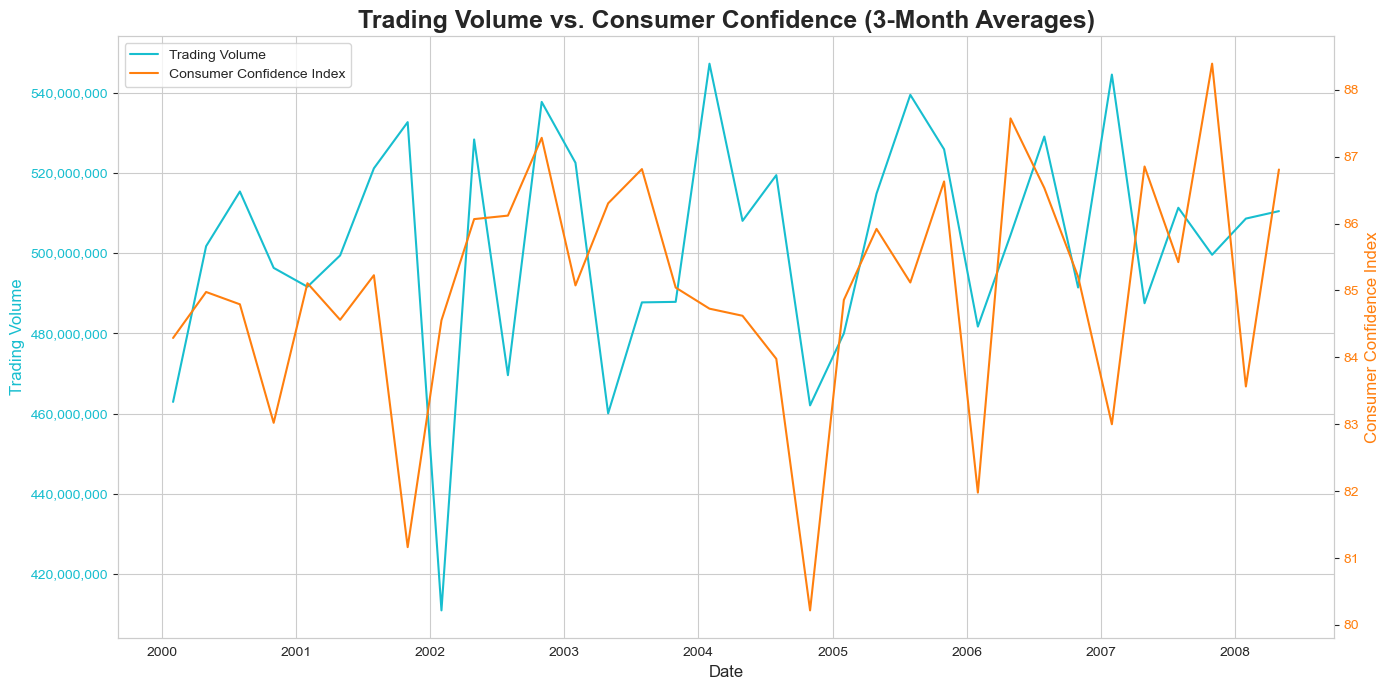

C:\Users\liyan\AppData\Local\Temp\ipykernel_9644\2662784026.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_avg_df = plot_df.resample('3M').mean().dropna()


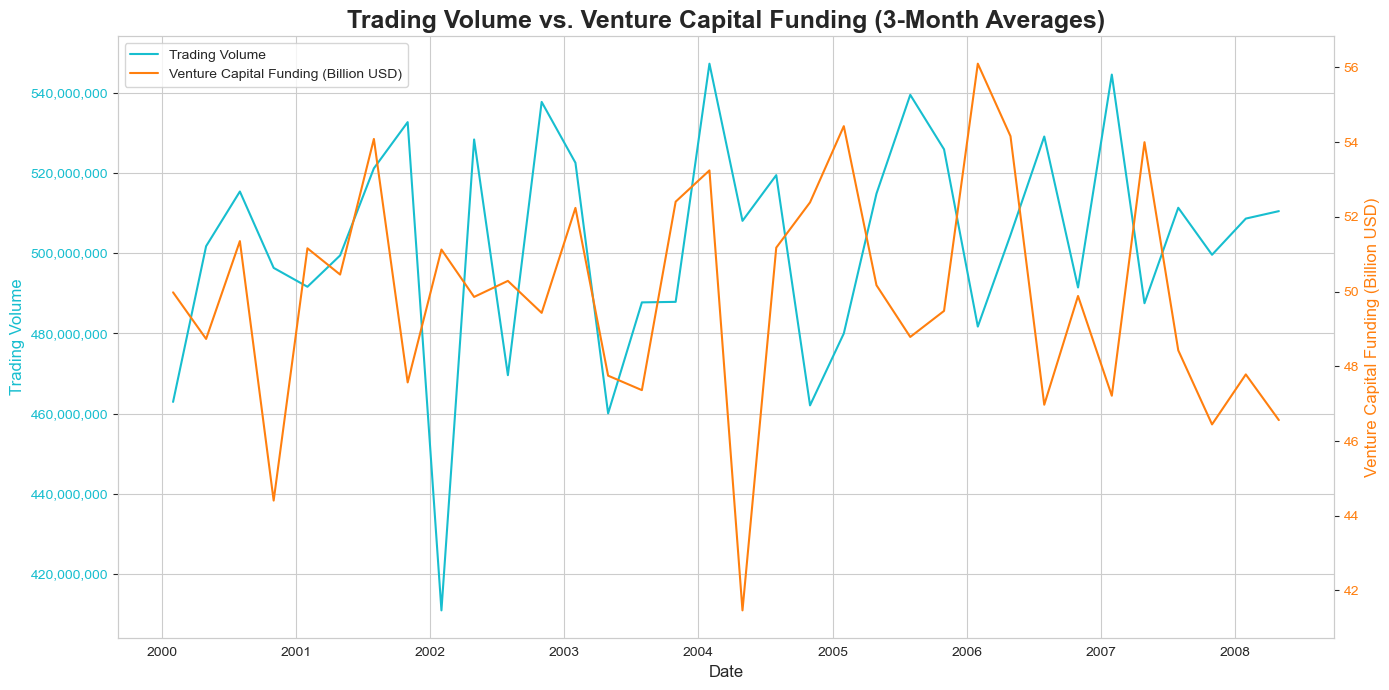

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Load and Clean the Data ---

df = pd.read_csv('finance_economics_dataset.csv')

# Clean column names for consistency
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\ufeff', '')
df.columns = df.columns.str.title()

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


# --- Function to Create a Dual-Axis Plot ---

def create_dual_axis_plot(data, col1, col1_label, col2, col2_label, title):
    """
    Generates and displays a dual-axis time series plot for two variables.
    """
    # Prepare data for the specific columns
    cols_to_process = [col1, col2]
    for col in cols_to_process:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    plot_df = data[cols_to_process].dropna()

    # Resample data into 3-month bins and calculate the mean
    quarterly_avg_df = plot_df.resample('3M').mean().dropna()

    # --- Plotting ---
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color1 = 'tab:cyan'
    color2 = 'tab:orange'

    # Plot Col 1 on the primary y-axis
    sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=col1, ax=ax1, color=color1, label=col1_label)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel(col1_label, color=color1, fontsize=12)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot Col 2 on the secondary y-axis
    sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=col2, ax=ax2, color=color2, label=col2_label)
    ax2.set_ylabel(col2_label, color=color2, fontsize=12)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.grid(False)

    # Finalize and show the plot
    plt.title(title, fontsize=18, weight='bold')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    ax2.get_legend().remove()
    plt.tight_layout()
    plt.show()


# --- 2. Generate the Two Requested Plots ---

# Plot 1: Trading Volume vs. Consumer Confidence
create_dual_axis_plot(
    data=df.copy(),
    col1='Trading Volume',
    col1_label='Trading Volume',
    col2='Consumer Confidence Index',
    col2_label='Consumer Confidence Index',
    title='Trading Volume vs. Consumer Confidence (3-Month Averages)'
)

# Plot 2: Trading Volume vs. Venture Capital Funding
create_dual_axis_plot(
    data=df.copy(),
    col1='Trading Volume',
    col1_label='Trading Volume',
    col2='Venture Capital Funding (Billion Usd)',
    col2_label='Venture Capital Funding (Billion USD)',
    title='Trading Volume vs. Venture Capital Funding (3-Month Averages)'
)
